# PDAN8411w POE : TASK 1 - LINEAR REGRESSION

### DATASET
**(i)Source:**<br>Kolawale,S. 2019. Linear Regression E-commerce Dataset: Kaggle.[Online]. Available at:<br> https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website)<br>

**(ii)Linear Regression** <br>
Linear regression is a supervised Machine Learning algorithm that models a relationship between 2 or more variable, 1 dependant variable that is usually the target variable denoted by y and 1 or independant variables (x-variable) that are normally the contributing/input features towards y. The studying of the relationship between these variables is often used to predict future events to make better decisions about the future.<br>

**(iii)Why this dataset** <br>
My chosen dataset from an online clothing store and contains customer details. The Online store has 2 platforms, an app and a website, and by monitoring the usage of both plartforms they can establish which of the 2 is mostly used by the customers, based on the time they spent on the platform and how much they have spent on 1 platform versus the other. This usage (time and money spent on the platforms) can efficiently be measured or monitored using regression methods. Regression analysis is known to measure continuous variables that are either going up or down, in this dataset, this would be the amount spent on either the website or the app, against the length of their membership as the customer of this online store.That is why this dataset is appropriate for regression analysis.The ultimate goal of creating the model is to be able to predict how much a customer is likely to spend based on the amount of time they have spend on the one of the platforms.<br>
**(iv)The Analysis of the dataset**<br>
Included in the analysis will the following:<br>
•	The importance of the existing features on the dataset, and the subsequent elimination of irrelevant features<br>
•	The comparison of time spent on the 2 different platforms<br>
•	The comparison of the money spent on the 2 platforms<br>
•	Exploring the relationships and linearity between the features<br>
•	The prediction of Yearly Amount Spent by customers(target variable) against various independent features i.e Length of Membership, Time Spent on App/Website.

 ### LIBRARIES
Pandas - To be able to convert this text file dataset into a Dataframe<br>Numpy - For Exploratory Data Analysis<br>Matplotlib and Seaborn - These will be used for the visualisation of the data<br>Scikitlearn - For the Machine Learning (Linear regression) model I will be building.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

#### For this assignment I am going to follow the Data Science Process steps shown in detail on the Diagram below
![](Pic.jpeg)


## STEP 1 : GET DATA

In [2]:
#Importing the dataset 
df = pd.read_csv("Ecommerce Customers.txt")

In [3]:
#Converting the dataset to a dataframe
Customers=pd.DataFrame(df)

In [4]:
#Meeting the data
Customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


## STEP 2 : EXPLORE & CLEAN THE DATA

### 2.1 Exploratory Data Analysis (EDA)

In [5]:
#Showing the first 6 rows/datapoints in the Customer dataset
Customers.head(6)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448


In [6]:
#Showing the last 3 rows/datapoints in the Customer dataset
Customers.tail(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [7]:
#Showing the descriptive statistics of the Customer Dataset
Customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
#showing more information about the Customer dataset(How many rows/entries, columns, Datatypes of each column)
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### 2.2 Cleaning the data

In [9]:
#Checking for unique/distinct values
#As seen below, all 7 columns have 500 unique values except for the Avatar columns,this means that for the 7 columns no customer has any information the same as another customer.But with Avatar,a lot of the customers are using the same/similar avatar.
Customers.nunique(axis=0)

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

In [10]:
#checking for null values(whethere or not there are null values)
#As seen below there are no null values therefore I won't be writing a code to see which column has and how many.
Customers.isnull().values.any()

False

In [11]:
Customers.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [12]:
#Dropping unnecessary columns(The Email,Address and Avatar columns are personal information and do not play any role in the amount of time a customer spends in either one of the 2 Online store applications.)
#This is part of feature-engineering,which includes deciding which features of the dataset are important for the accuracy of the model, and features that do not have any effect on the results should be removed from the dataset.
Customers_cleaned=Customers.drop(['Email','Address','Avatar'], axis=1)
Customers_cleaned

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [13]:
#Changing the name of the Average length column(to remove the fullstop to have a uniform way of column titles)
Customers_cleaned=Customers_cleaned.rename({'Avg. Session Length': 'Avg Session Length'}, axis=1)

In [14]:
Customers_cleaned

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [15]:
#Checking how many (Rows,Columns) the new dataframe now has, after droping the 3 personal information columns
Customers_cleaned.shape

(500, 5)

### 2.3 Visualising the data

In [16]:
#checking the correlation
Correlation=Customers_cleaned.corr()
Correlation

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

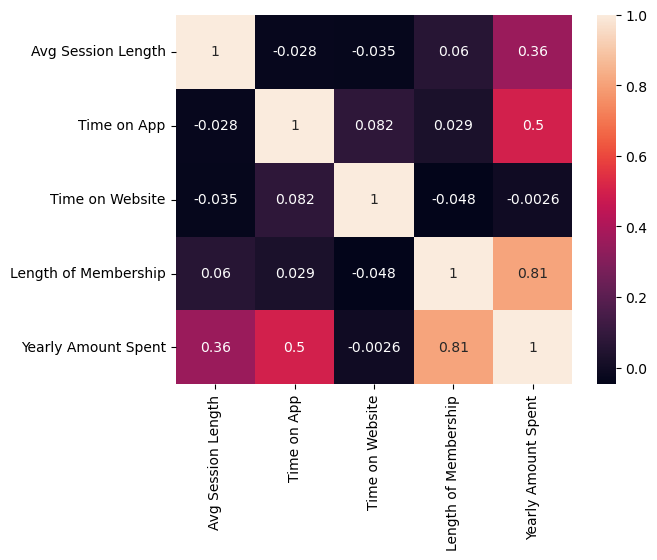

In [17]:
#visualising the correlation with a heatmap
sns.heatmap(Correlation,annot=True)

<AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

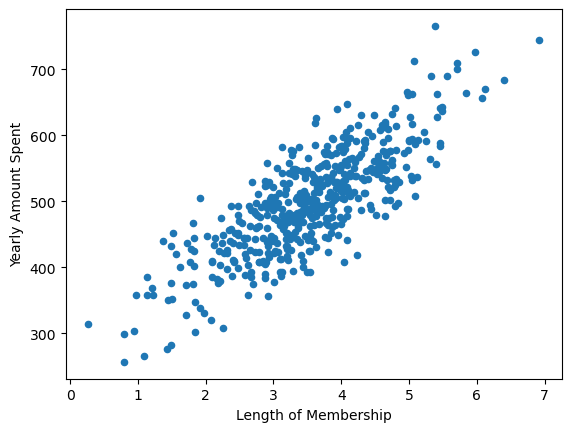

In [18]:
#Checking the linearity of the identified relationships
Customers_cleaned.plot(kind='scatter',x='Length of Membership', y='Yearly Amount Spent')

<AxesSubplot:xlabel='Time on App', ylabel='Yearly Amount Spent'>

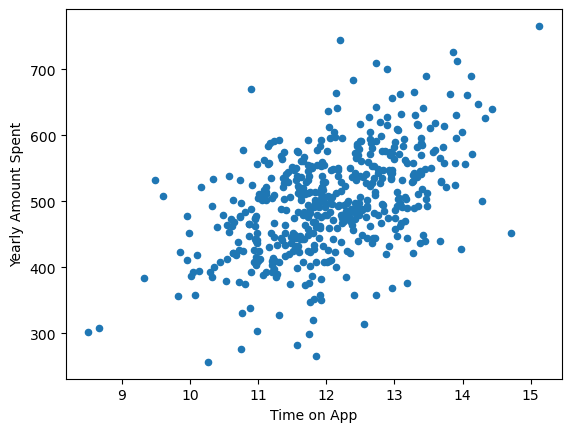

In [19]:
Customers_cleaned.plot(kind='scatter',x='Time on App', y='Yearly Amount Spent')

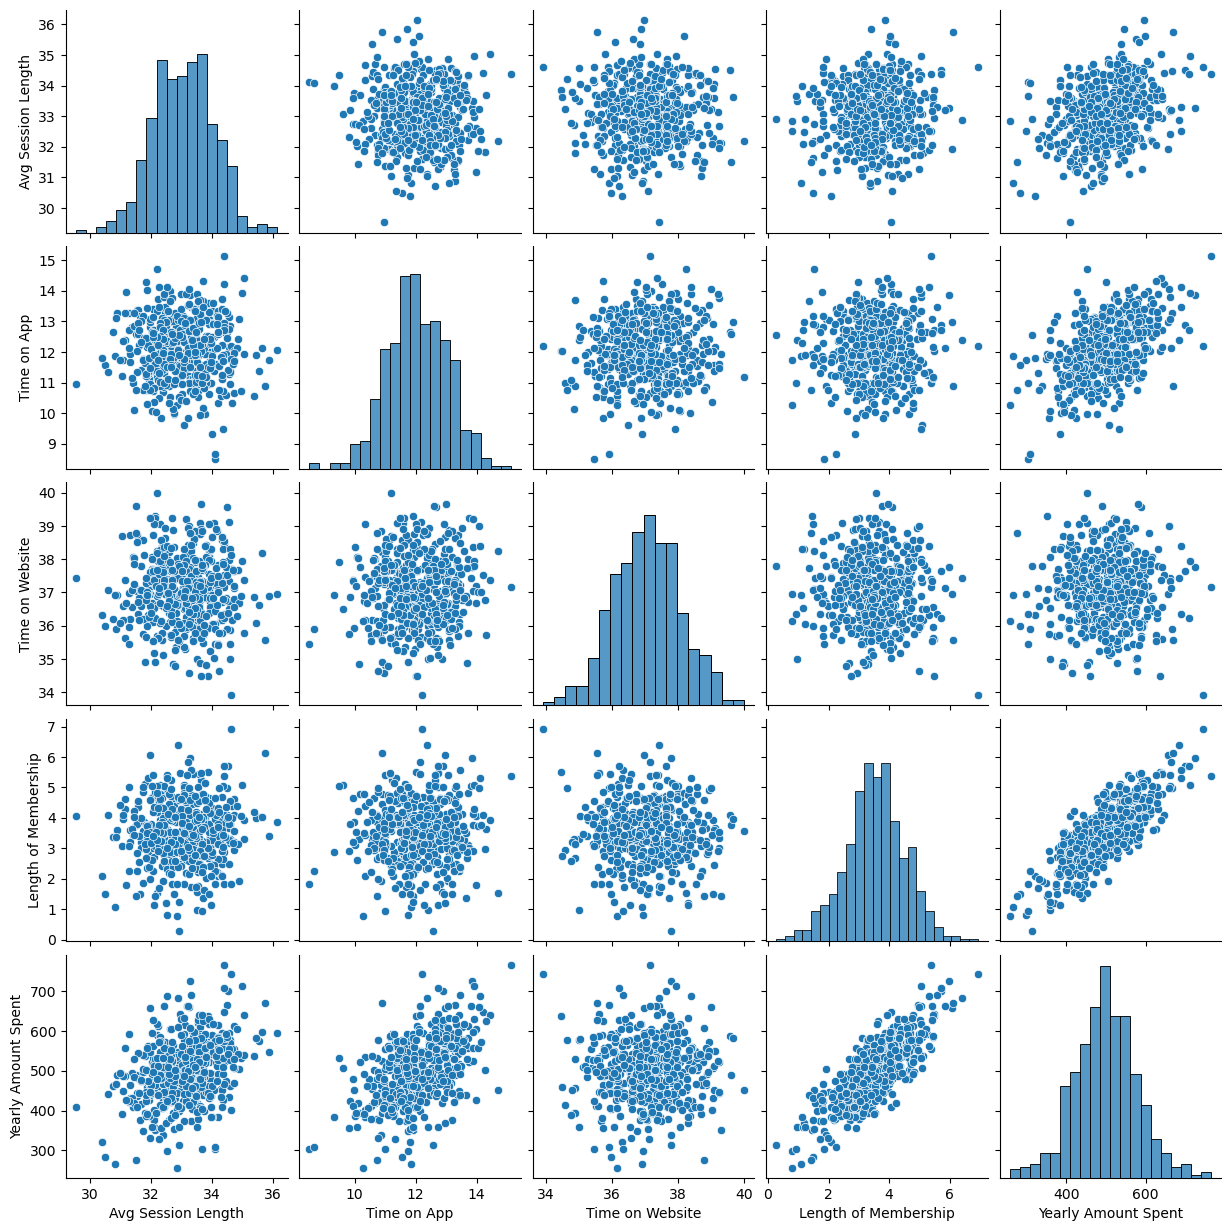

In [20]:
sns.pairplot(data=Customers_cleaned)

<span style='background:yellow'> **As seen on all the visuals above:<br>
1.There is a strong positive relationship and linearity between Length of Membership and the Yearly Amount spent,
This means that customers who have longer memberships have spent more money buying on the online store overtime.<br>
2.There is a moderate relationship and some linearity(0.5) between Yearly Amount Spent and the time used on the App.<br>
3.Based on the heatmap and the scatterplots above,it looks like Customers spend more and purchase more on the app compared to the website.<br>
4.There is also weak positive (0.36)correlation and linearity between the Average Session Length and the Yearly Amount Spent,this means that customers who spend more time on the fitting sessions the online store offer, were likely to purchase more from the online store.<br>
5.There is no correlation and/or linearity between the rest of the features.** </span>


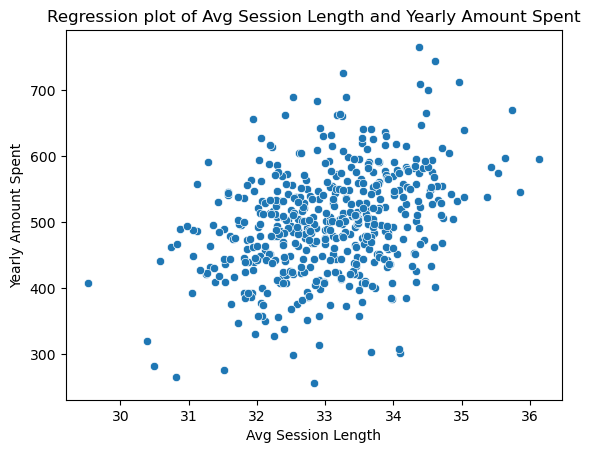

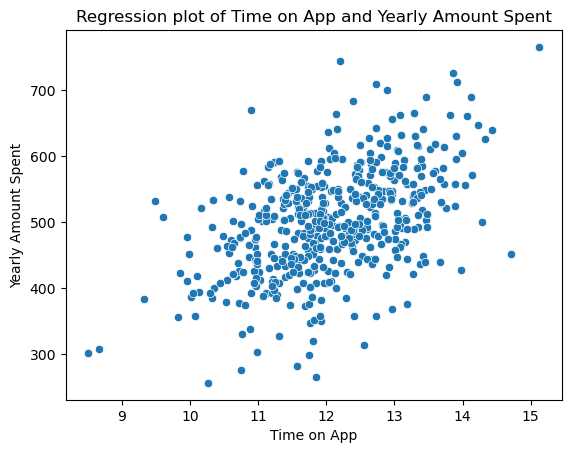

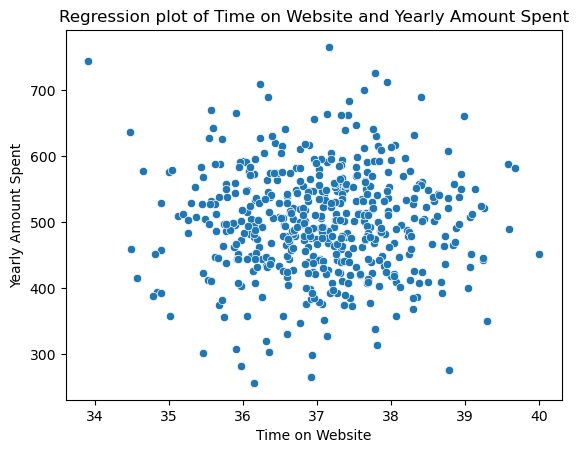

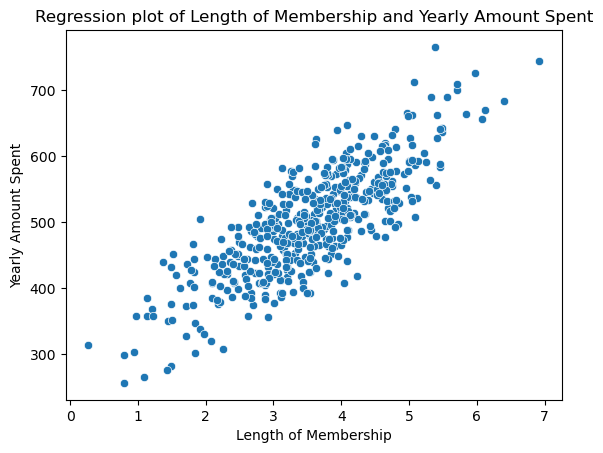

In [21]:
#look for outliers
variables = ['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership', ]
for var in variables:
    plt.figure()
    sns.scatterplot(x=var, y='Yearly Amount Spent', data=Customers_cleaned).set(title=f'Regression plot of {var} and Yearly Amount Spent');

<span style='background:yellow'> **Based on the visualisations above, I do not foresee any outliers that could significantly influence the results of my model therefore i will not be removing outliers.**  </span>


In [22]:
#Scaling the data(normalising the dataset due to the different units of measure in the different features)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(Customers_cleaned)

array([[ 1.45635117,  0.60728003,  2.49358859,  0.55010651,  1.11865385],
       [-1.13650215, -0.94946372,  0.20655573, -0.87092735, -1.35178302],
       [-0.05272322, -0.72713923,  0.04968115,  0.5720669 , -0.14850091],
       ...,
       [-0.40987204, -0.55685385,  1.26018697,  1.42726105,  0.66013536],
       [ 0.27159708,  0.34124841, -0.21829075, -1.19904197, -0.54072439],
       [ 0.66842216,  0.36882066, -1.27732288, -0.79967926, -0.01937765]])

## STEP 3 : TRAIN THE MODEL

In [23]:
#Importing the algorithm(Linear Regression)
from sklearn.linear_model import LinearRegression

In [24]:
#Importing the train/test split
from sklearn.model_selection import train_test_split

In [25]:
#Indentifying the x and y variables
y=Customers_cleaned[['Yearly Amount Spent']]
X=Customers_cleaned[['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [26]:
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


In [27]:
X

,Avg Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [28]:
#Splitting the train/test data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [29]:
#Fitting the model into the algorithm & training the model
MyModel=LinearRegression()

In [30]:
MyModel.fit(X_train,y_train)

LinearRegression()

In [31]:
#Indentifying the intercept and coefficient for the equation that best fits the regression line of this model
intercept=MyModel.intercept_
coefficient=MyModel.coef_

In [32]:
intercept

array([-1044.25741464])

In [33]:
coefficient

array([[25.5962591 , 38.78534598,  0.31038593, 61.89682859]])

## STEP 4 : TESTING THE MODEL

### 4.1 testing

In [34]:
y_train_prediction=MyModel.predict(X_train)

In [35]:
y_train_prediction

array([[519.04868482],
       [434.01477893],
       [596.35494206],
       [487.60679544],
       [406.6729539 ],
       [523.79645873],
       [503.76148922],
       [451.26575988],
       [524.22048671],
       [456.80397192],
       [443.41431262],
       [457.31746936],
       [448.13987537],
       [437.69137165],
       [677.4078197 ],
       [565.65150482],
       [651.92919002],
       [380.72939653],
       [577.68569028],
       [578.19357391],
       [518.02752158],
       [538.69815697],
       [376.67745699],
       [663.90619271],
       [523.35144036],
       [456.62441734],
       [445.79712507],
       [388.01117723],
       [520.96134979],
       [431.68593401],
       [459.71091963],
       [425.78932775],
       [432.9311016 ],
       [635.1469185 ],
       [462.47406368],
       [460.06663656],
       [512.29900788],
       [703.90478098],
       [411.18777447],
       [551.19032799],
       [553.51724709],
       [409.25156728],
       [422.25800457],
       [509

In [36]:
y_test_prediction=MyModel.predict(X_test)

In [37]:
y_test_prediction

array([[402.86230051],
       [542.53325708],
       [426.62011918],
       [501.91386363],
       [409.6666551 ],
       [569.92155038],
       [531.50423529],
       [505.94309188],
       [408.10378607],
       [473.45942928],
       [441.18668812],
       [424.52463471],
       [424.83341694],
       [527.12061508],
       [430.87985533],
       [423.47062047],
       [575.8751518 ],
       [484.6563331 ],
       [457.77896975],
       [481.58742311],
       [501.56110993],
       [513.12815188],
       [507.49166899],
       [646.63377343],
       [449.70050586],
       [496.26290484],
       [556.18523776],
       [554.78684161],
       [399.1582784 ],
       [325.16921284],
       [532.62732659],
       [477.73025415],
       [500.76491535],
       [305.09971374],
       [505.46811902],
       [483.52069444],
       [519.09464122],
       [437.75549737],
       [456.25005245],
       [470.63517876],
       [494.11207805],
       [444.65549239],
       [508.57079732],
       [500

In [38]:
Training_score=MyModel.score(X_train,y_train)
Testing_score=MyModel.score(X_test,y_test)

In [39]:
Training_score

0.9854240629700333

In [40]:
Testing_score

0.9778130629184129

### 4.2 Checking the error rate


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error

In [42]:
mae = mean_absolute_error(y_test,y_test_prediction)
mse = mean_squared_error(y_test,y_test_prediction)
msre = np.sqrt(mse)

In [43]:
mae

8.55844188531521

In [44]:
mse

109.8637411839393

In [45]:
msre

10.481590584636441

In [49]:
from sklearn.metrics import r2_score

In [50]:
#Calculating R-Squared(R2)
R2=r2_score(y_test,y_test_prediction)

In [51]:
R2

0.9778130629184129

<span style='background:yellow'> Based on my Error rates above, I can say that my model has learnt the dataset and pattern and it can generalise well.<br> The online store can successfully use this model to predict how much a customer would like spend  based on the amount of time they have spent on the app.  </span>